In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train= pd.read_csv("C:/Users/User/Desktop/BigMartMacinelearning/Train.csv")

In [3]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.shape

(8523, 12)

In [7]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Sadece eksik değeri olanları al

print(missing_values)

Item_Weight    1463
Outlet_Size    2410
dtype: int64


In [9]:
# EKSİK VERİLERİN DOLDURULMASI VE KATEGORİLERİN DÜZENLENMESİ

In [10]:
# Aynı Item_Identifier'e sahip ürünlerin ortalama ağırlığı ile eksikleri dolduralım

df_train["Item_Weight"].fillna(df_train.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)




In [11]:
# Aynı Outlet_Type'e göre en sık geçen  değeri kullanarak eksikleri dolduralım
mode_outlet_size = df_train.pivot_table(values="Outlet_Size", index="Outlet_Type", aggfunc=lambda x: x.mode()[0])


In [12]:
missing_outlet_mask = df_train["Outlet_Size"].isnull()

df_train.loc[missing_outlet_mask, "Outlet_Size"] = df_train.loc[missing_outlet_mask, "Outlet_Type"].map(mode_outlet_size.to_dict()["Outlet_Size"])

In [13]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)
# 4 satır hala boş

In [15]:
df_train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
df_train["Outlet_Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [17]:
df_train["Item_Fat_Content"].unique()


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
#Item_Fat_Content de 'Low Fat', 'Regular', 'low fat', 'LF', 'reg'değerlerini düzeltelim.

In [19]:
df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})


In [20]:
df_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [24]:
df_train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
df_train["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [26]:
df_train["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [27]:
df_train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [28]:
# İtem_visibility ve item-MRP ,item_Outlet_Sales İNCELEME vE DÜZENLEME

In [29]:
# İtem_visibility

In [30]:
#  İtem_visibility de 526 satır 0 görünüyor veriler hatalı girilmiş olabilir.
#  Not modeli visibility 0 ve ortalamayla doldurulmuş olarak iki kere eğiteceğim.

In [31]:
zero_visibility_sales = df_train[(df_train["Item_Visibility"] == 0) & (df_train["Item_Outlet_Sales"] > 0)]

In [32]:
print(f"Toplam {len(zero_visibility_sales)} satırda görünürlük 0 ama satış yapılmış.")

Toplam 526 satırda görünürlük 0 ama satış yapılmış.


In [33]:
print("\nEn çok geçen Item_Type:")
print(zero_visibility_sales["Item_Type"].value_counts().head(10))


En çok geçen Item_Type:
Item_Type
Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Name: count, dtype: int64


In [34]:
print("\nOutlet bazında dağılım:")
print(zero_visibility_sales["Outlet_Identifier"].value_counts())


Outlet bazında dağılım:
Outlet_Identifier
OUT018    65
OUT046    61
OUT027    60
OUT013    59
OUT045    58
OUT017    57
OUT035    54
OUT049    53
OUT019    30
OUT010    29
Name: count, dtype: int64


In [35]:
#  Item_Outlet_Sales

In [36]:
df_train.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)
# .sort_values(ascending=False) büyükten küçüğe sıraladım.

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

In [37]:
# Ortalama satış
df_train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

In [38]:
# Toplam satış
sales = df_train.groupby("Outlet_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)
sales = sales.apply(lambda x: f"{x:,.0f}")
print(sales)


Outlet_Type
Supermarket Type1    12,917,342
Supermarket Type3     3,453,926
Supermarket Type2     1,851,823
Grocery Store           368,034
Name: Item_Outlet_Sales, dtype: object


In [39]:
# Lokasyon tiplerine göre ortalama Satış
df_train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)

Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2279.627651
Tier 1    1876.909159
Name: Item_Outlet_Sales, dtype: float64

In [40]:
 # SATIŞ İNCELEME

In [41]:
# 1.  Genel Satış Dağılımını İnceleyelim
# İlk olarak Item_Outlet_Sales dağılımını histogram ile gösterelim. Böylece satışların hangi aralıkta yoğunlaştığını görebiliriz.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

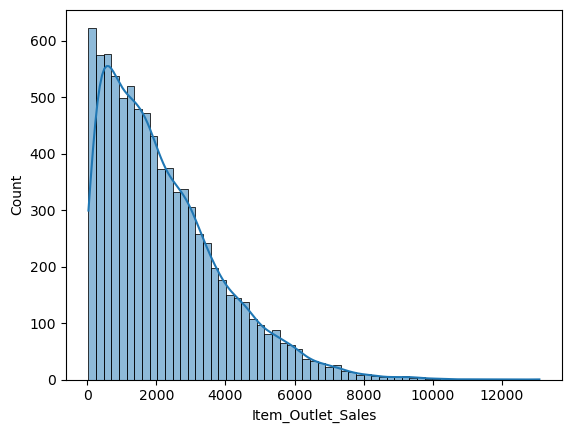

In [42]:
import seaborn as sns
sns.histplot(df_train["Item_Outlet_Sales"], kde=True)


In [43]:
#1️. Genel Satış Dağılımı 
#Satış dağılımı sağa çarpık
#Düşük satış değerleri daha fazla, yüksek satış değerleri ise daha nadir.
#Çok yüksek satış yapan ürünler az sayıda olabilir, bu yüzden outlier kontrolü YAPALIM.

In [44]:
# 2. Mağaza Türlerine göre Satışlar
# Farklı mağaza türlerinde satışların nasıl değiştiğini inceleyelim.

In [45]:
# Mağaza türlerine göre ortalama satışlar
avg_sales_by_outlet = df_train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().reset_index()


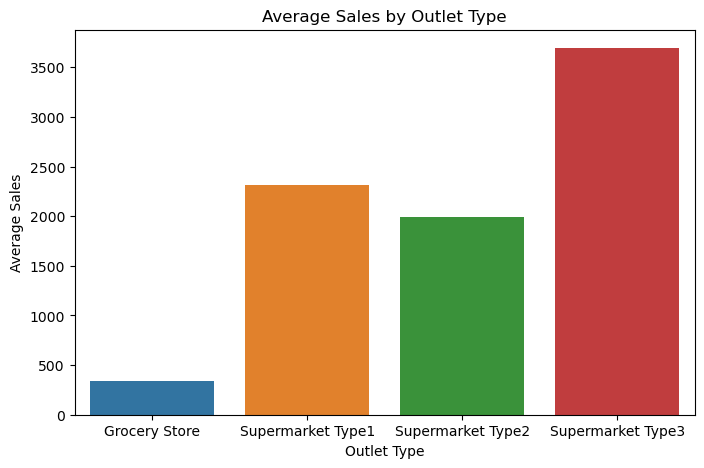

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=avg_sales_by_outlet, x="Outlet_Type", y="Item_Outlet_Sales")
plt.xlabel("Outlet Type")
plt.ylabel("Average Sales")
plt.title("Average Sales by Outlet Type")
plt.show()


In [47]:
#2. Mağaza Türüne Göre Ortalama Satışlar
#Hipermarketler (Supermarket Type3) açık ara farkla en yüksek satışa sahip.
#Süpermarket Type1 ve Type2 daha düşük satışlar yapıyor.
# Grocery en düşük.

In [48]:
#3.LokastonTürüne Göre Ortalama Satışlar

In [49]:
avg_sales_by_location = df_train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values(ascending=False)

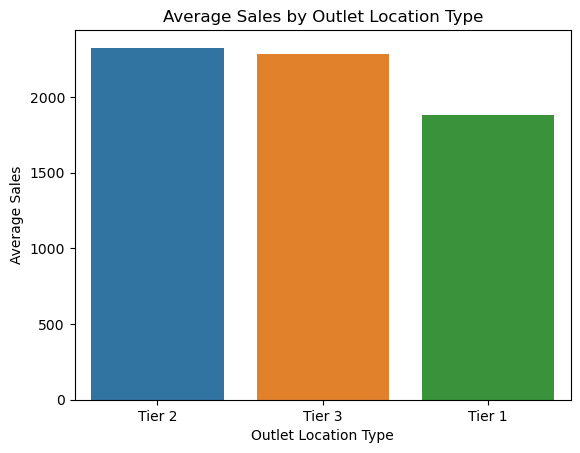

In [50]:
sns.barplot(x=avg_sales_by_location.index, y=avg_sales_by_location.values)
plt.xlabel("Outlet Location Type")
plt.ylabel("Average Sales")
plt.title("Average Sales by Outlet Location Type")
plt.show()

In [51]:
#Tier 1 ortalama satışta düşük çıkmış.

In [52]:
# Korelasyon bakalım
df_train.select_dtypes(include=["number"]).corr()["Item_Outlet_Sales"].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.013165
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

In [53]:
#Item_MRP :0.567574 Orta düzeyde korelasyon → ürünün fiyatı arttıkça satış da artma eğiliminde. 
#Item_Weight: 0.013165ürün ağırlığının satışla pek ilişkisi yok. 
# diğerleri anlamsız sayılır

In [54]:
#4️. Item_MRP ile Satış İlişkisi
# Ürünlerin fiyatı arttıkça satışlar nasıl değişiyor? 

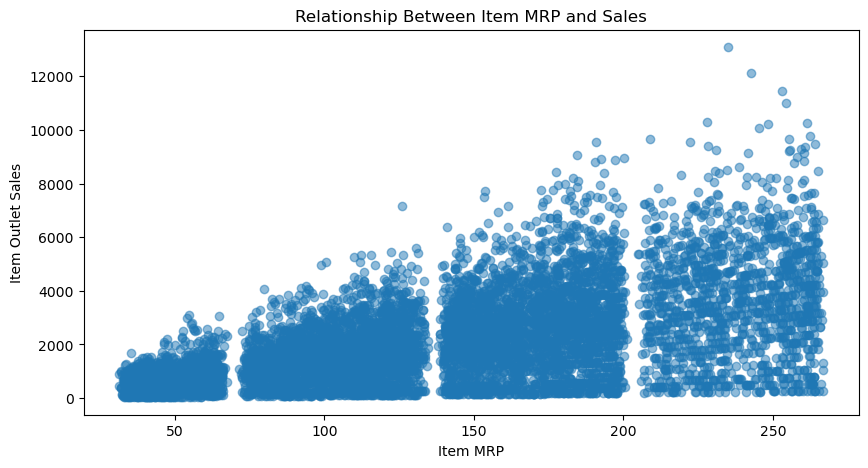

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(df_train["Item_MRP"], df_train["Item_Outlet_Sales"], alpha=0.5)
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Relationship Between Item MRP and Sales")
plt.show()


In [56]:
#4️. Ürün Fiyatı ile Satış İlişkisi
#Düşük fiyatlı ürünler genellikle daha fazla satılıyor.
#Ancak fiyat arttıkça satış miktarında düzenli bir azalma yok.
#Belli fiyat aralıklarında satışlar daha yoğun  100-150
#Fiyat, satışları etkiliyor ancak doğrudan bir doğrusal ilişki yok.

In [57]:
# NOT :Model İçin Hangi Özellikleri Kullanmalıyız?
# Önemli sütunlar
#Item_Type Ürün kategorisi
#Outlet_Type Mağaza türü
#Item_MRP Ürün fiyatı

In [58]:
#KATEGORİ ANALİZİ

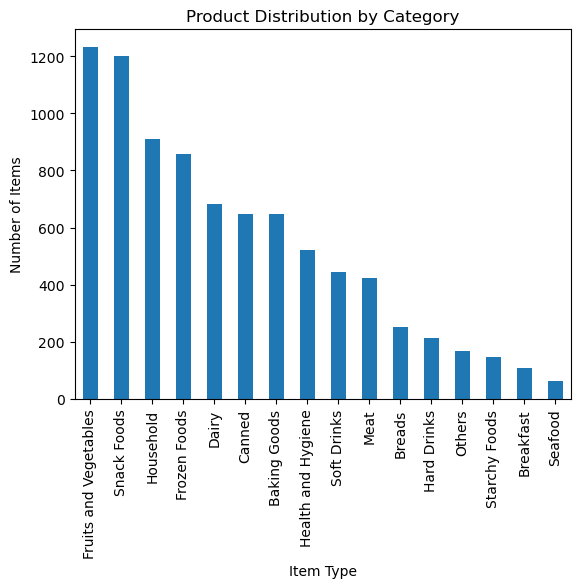

In [59]:
#Kategorilere göre ürün dağılımı

df_train["Item_Type"].value_counts().plot(kind="bar")
plt.xlabel("Item Type")
plt.ylabel("Number of Items")
plt.title("Product Distribution by Category")
plt.show()

In [60]:
# Ürün tipine göre ortalama satışlar
avg_sales_by_type = df_train.groupby("Item_Type")["Item_Outlet_Sales"].mean().reset_index()


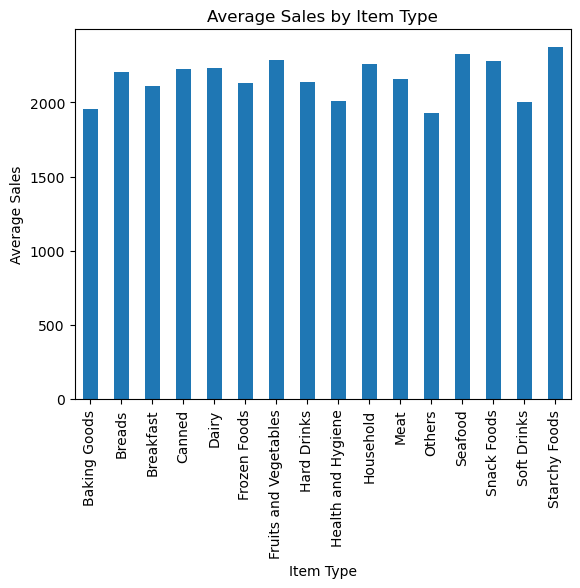

In [61]:
avg_sales_by_type.plot(kind="bar", x="Item_Type", y="Item_Outlet_Sales", legend=False)
plt.xlabel("Item Type")
plt.ylabel("Average Sales")
plt.title("Average Sales by Item Type")
plt.xticks(rotation=90)  
plt.show()


In [62]:
#  Ürün Tiplerine Göre Ortalama Satış Miktarları
# Bazı ürünler çok daha fazla satılıyor, bazıları ise düşük satışta kalıyor.
# En yüksek satış yapan ürün grubu "Starchy Foods" gibi görünüyor.
# Düşük satış yapan gruplar arasında ise "Health and Hygiene" ürünleri ve "Baking Goods" ve "Others"

In [63]:
# MODEL DENEME

In [64]:
df_model_1 = df_train.copy()

In [65]:
# bazı sütunları drop edelim
df_model_1.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [66]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_model_1.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [67]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 1053.79
R² Score: 0.5914


In [70]:
# Deneme 2 item_visibility 0'lara bayrak atama

In [71]:
df_model_2 = df_train.copy()

In [72]:
# bazı sütunları drop edelim
df_model_2.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [73]:
# visibility "0" olanları işaretledik 
df_model_2["Is_Visibility_Zero"] = (df_model_2["Item_Visibility"] == 0).astype(int)

In [74]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_model_2.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [75]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1057.77
R² Score: 0.5883


In [78]:
# item_visibility'ideki 0 ları mean ile doldur kontrol et.
# Bu değerleri ürün bazlı ortalama görünürlükle dolduralım
# OLMADI RMSE YÜKSELDİ

In [79]:
# Item_Visibility kontrol
#Item_Visibility = Ürünün Raf Alanı / Toplam Mağaza Raf Alanı

In [80]:
df_train[df_train["Item_Visibility"] <= 0 ]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Non-Edible,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,7.315,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Non-Edible,0.0,Household,110.4912,OUT017,2007,Small,Tier 2,Supermarket Type1,1637.8680


In [81]:
(df_train["Item_Visibility"] <= 0).sum()

526

In [82]:
# 526 satırda ürün görünürlüğü 0 bu yüzden satışı yapılmış mı kontrol edeceğiz. Hepsinin satışı yapılmış. Yani yanlış girilmiş
# 0 olmaması lazım

In [83]:
df_model_3 = df_train.copy()

In [84]:
# Ürün bazlı ortalama görünürlük
visibility_mean = df_model_3.groupby("Item_Identifier")["Item_Visibility"].transform("mean")

In [85]:
# Görünürlüğü 0 olanlara ortalama atadık
df_model_3.loc[df_model_3["Item_Visibility"] == 0, "Item_Visibility"] = visibility_mean

In [86]:
# 0 olan kaldımı kontrol
zero_visibility_count = (df_model_3["Item_Visibility"] == 0).sum()
print(f"0 olan satır sayısı: {zero_visibility_count}")

0 olan satır sayısı: 0


In [87]:
# bazı sütunları drop edelim
df_model_3.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [88]:
df_encoded = df_model_3.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [89]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1043.69
R² Score: 0.5992


In [92]:
#  3. DENEME item vibility ve flag birlikte

In [93]:
df_model_4 = df_train.copy()

In [94]:
df_model_4["Is_Visibility_Zero"] = (df_model_4["Item_Visibility"] == 0).astype(int)

In [95]:
visibility_mean = df_model_4.groupby("Item_Identifier")["Item_Visibility"].transform("mean")
df_model_4.loc[df_model_4["Item_Visibility"] == 0, "Item_Visibility"] = visibility_mean

In [96]:
# 0 olan kaldımı kontrol
zero_visibility_count = (df_model_4["Item_Visibility"] == 0).sum()
print(f"0 olan satır sayısı: {zero_visibility_count}")

0 olan satır sayısı: 0


In [97]:
# bazı sütunları drop edelim
df_model_4.drop(["Item_Identifier", "Outlet_Establishment_Year"], axis=1, inplace=True)

In [98]:
df_encoded = df_model_4.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [99]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1055.68
R² Score: 0.5900


In [102]:
# df_model_4 ile devam RMSE:1046.04 R2 0.5974
# visibility i grupluyorum

In [103]:
df_model_5 = df_model_4.copy()

In [104]:
df_model_5["Visibility_Group"] = pd.cut(
    df_model_5["Item_Visibility"],
    bins=[-0.01, 0.05, 0.1, 0.2, df_model_5["Item_Visibility"].max()],
    labels=["Very Low", "Low", "Medium", "High"]
)

In [105]:
df_model_5["Visibility_Group"] = df_model_5["Visibility_Group"].astype(str)
# categori tipinde çünkü

In [106]:
df_encoded = df_model_5.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [107]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 1049.49
R² Score: 0.5948


In [110]:
## Model 6

In [ ]:
#  FEATURE ENGINEERING 

In [ ]:
# MAĞAZA YAŞI

In [ ]:
df_model_6 = df_model_4.copy()

In [ ]:
df_model_6["Outlet_Establishment_Year"] = df_train["Outlet_Establishment_Year"]

In [ ]:
df_model_6["Outlet_Age"] = 2013 - df_model_6["Outlet_Establishment_Year"]

In [ ]:
df_model_6.drop(["Outlet_Establishment_Year"] , axis= 1 , inplace= True)

In [ ]:
df_encoded = df_model_6.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Model 7 MRP

In [ ]:
df_model_7=df_model_4.copy()

In [ ]:
#İtem_MRP_Range sütunu ekliyoruz.

In [ ]:
# item_MRP veriyi eşit sayıda gözleme böldük

In [ ]:
df_model_7["Item_MRP"].describe()

In [ ]:
# Minimum fiyat: 31 TL
# Ortalama: 140 TL
# Çeyreklikler:
# %25’i 94 TL'den az
# %50’si 143 TL'den az
# %75’i 185 TL'den az
# Ürünlerin çoğunluğu 100–200 TL bandında
# Aşırı düşük veya yüksek fiyatlı ürün sayısı az


In [ ]:
bins = [0, 90, 140, 200, 300]
labels = ["Low", "Medium", "High", "Very High"]

df_model_7["Item_MRP_Range"] = pd.cut(df_model_7["Item_MRP"], bins=bins, labels=labels)


In [ ]:
#Item_MRP	Satış fiyatı ; doğrudan etkili
#Item_Visibility	Raf görünürlüğü ;satış potansiyelini etkileyebilir****BİRAZ
#Item_Type	Ürün türü ;talep farklılıkları***** BAK

#Outlet_Location_Type	Bölge ; şehir, köy, kasaba etkisi olabilir**** BELKİ BAK
#Outlet_Size	Mağaza büyüklüğü ; stok ve satış etkisi*****

In [ ]:
df_model_7.info() 

In [ ]:
df_model_7["Item_MRP_Range"] = df_model_7["Item_MRP_Range"].astype(str)
# categori tipinde çünkü

In [ ]:
df_encoded = df_model_7.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# 8. DENEME item MRP DEVAM

In [ ]:
df_model_8= df_model_4.copy()

In [ ]:
df_model_8["MRP_Visibility"] = df_model_8["Item_MRP"] * df_model_8["Item_Visibility"]

#"görünürlüğü yüksek ama ucuz ürünler" farklı davranabilir.

In [ ]:
df_encoded = df_model_8.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Deneme 9

In [ ]:
df_model_9 = df_model_4.copy()

In [ ]:
df_model_9["MRP_per_Weight"] = df_model_9["Item_MRP"] / df_model_9["Item_Weight"]
# Bazı ürünlerin gramajına göre fiyatı daha pahalıdır.

In [ ]:
df_encoded = df_model_9.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Deneme 10 Uç değer filitereleme

In [ ]:
df_model_10 =df_model_4.copy()

In [ ]:
#Uç değer kontrolü
plt.figure(figsize=(10,4))
sns.boxplot(x=df_model_10["Item_MRP"])
plt.title("Sales - Boxplot (Uç Değer Göstergesi)")
plt.show()

In [ ]:
df_model_10["MRP_Is_High"] = (df_model_10["Item_MRP"] > 250).astype(int)


In [ ]:
df_encoded = df_model_10.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# Deneme 11 Item_Outlet_Sales de Uç değer tanımlıyorum

In [ ]:
df_model_11=df_model_4.copy()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(x=df_model_11["Item_Outlet_Sales"])
plt.title("Sales - Boxplot (Uç Değer Göstergesi)")
plt.show()


In [ ]:
df_model_11["High_Sale"] = (df_model_11["Item_Outlet_Sales"] > 6000).astype(int)


In [ ]:
df_encoded = df_model_11.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
#Deneme 13  df_model_4 ile devam

In [ ]:
df_model_13 = df_model_4.copy()

In [ ]:
#df_model_13["Is_High_MRP_Premium"] = ((df_model_13["Item_MRP"] > 200) & (df_model_13["Outlet_Type"] == "Supermarket Type3")).astype(int)

In [ ]:
df_model_13["Is_High_Price"] = (df_model_13["Item_MRP"] > 200).astype(int)


In [ ]:
#df_model_13["Premium_Outlet"] = (df_model_13["Outlet_Type"] == "Supermarket Type3").astype(int)


In [ ]:
df_encoded = df_model_13.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
#Deneme 14

In [ ]:
df_model_14 = df_model_4.copy()

In [ ]:
# Orijinal veriden "Item_Identifier"  sütununu geri aldım
df_model_14["Item_Identifier"] = df_train.loc[df_model_14.index, "Item_Identifier"]

# İlk 2 harfini alarak yeni bir kategori üretim
df_model_14["Item_Code_Type"] = df_model_14["Item_Identifier"].str[:2]


In [ ]:
#  Item_Category: Ürün kimliğinden kategori çıkartalım
df_model_14["Item_Code_Type"] = df_model_14["Item_Identifier"].apply(lambda x: x[:2])
df_model_14["Item_Code_Type"] = df_model_14["Item_Code_Type"].map({
    "FD": "Food", 
    "DR": "Drinks", 
    "NC": "Non-Consumable"
})

In [ ]:
df_model_14.drop(["Item_Identifier"], axis=1, inplace=True)

In [ ]:
df_model_14.drop(["Item_Type"], axis=1, inplace=True)

In [ ]:
df_encoded = df_model_14.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# DENEME 15
#Yüksek fiyat yüksek görürnürlük deniyoruz.

In [ ]:
df_model_15 = df_model_6.copy()

In [ ]:
df_model_15["Is_New_Store"] = (df_model_15["Outlet_Age"] < 10).astype(int)

In [ ]:
#df_model_6["Price_Visibility"] = df_model_6["Item_MRP"] * df_model_6["Item_Visibility"]


In [ ]:
#df_model_6.drop(["Price_Visibility"], axis=1, inplace=True)

In [ ]:
# df_model_6["Weight_Visibility"] = df_model_6["Item_Weight"] * df_model_6["Item_Visibility"]

In [ ]:
df_encoded = df_model_15.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
#Denemme 16
df_model_16 = df_model_13.copy()

In [ ]:
df_model_16["Is_High_MRP"] = df_model_16["Is_High_Price"] * df_model_16["Item_MRP"]

#“Pahalı ürünler arasında fiyattaki artış satışları nasıl etkiliyor?”
#Ucuz ürünlerde MRP değişimi o kadar etkili olmayabilir

In [ ]:
df_encoded = df_model_16.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
#Deneme 17 İLE DEVAM ET

In [ ]:
df_model_17= df_model_13.copy()

In [ ]:

df_model_17["Price_Location_Interaction"] = df_model_17["Is_High_Price"] * df_model_17["Outlet_Location_Type"]
#lokasyon seviyesi ürün pahalı  mi?

In [ ]:
df_encoded = df_model_17.copy()
label_cols = df_encoded.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
X = df_encoded.drop("Item_Outlet_Sales", axis=1)
y = df_encoded["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

In [ ]:
# GRİD

In [ ]:
df_final = df_model_4.copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = df_final.select_dtypes(include=["object"]).columns 

le = LabelEncoder()
for col in label_cols:
    df_final[col] = le.fit_transform(df_final[col])


In [ ]:
X = df_final.drop("Item_Outlet_Sales", axis=1)
y = df_final["Item_Outlet_Sales"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

grid = GridSearchCV(xgb, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


In [ ]:
import joblib
joblib.dump(best_model, "xgb_final_model.pkl")


In [ ]:
raise systemExit

In [ ]:
# Teste geçelim

In [ ]:
df_test= pd.read_csv("C:/Users/User/Desktop/BigMartMacinelearning/Test.csv")

In [ ]:
# Aynı Item_Identifier'e sahip ürünlerin ortalama ağırlığı ile eksikleri dolduralım
df_test["Item_Weight"].fillna(df_test.groupby("Item_Identifier")["Item_Weight"].transform("mean"), inplace=True)

In [ ]:
# Aynı Outlet_Type'e göre en sık geçen  değeri kullanarak eksikleri dolduralım
mode_outlet_size = df_test.pivot_table(values="Outlet_Size", index="Outlet_Type", aggfunc=lambda x: x.mode()[0])

In [ ]:
missing_outlet_mask = df_test["Outlet_Size"].isnull()

df_test.loc[missing_outlet_mask, "Outlet_Size"] = df_test.loc[missing_outlet_mask, "Outlet_Type"].map(mode_outlet_size.to_dict()["Outlet_Size"])

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(), inplace=True)
# 20 satır hala boş

In [ ]:
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})

In [ ]:
df_test["Item_Fat_Content"].unique()

In [ ]:
df_test["Is_Visibility_Zero"] = (df_test["Item_Visibility"] == 0).astype(int)

In [ ]:
# 1. Eğitim setinden görünürlük ortalamalarını al
visibility_means = df_train.groupby("Item_Identifier")["Item_Visibility"].mean()

# 2. Test setinde 0 olanları eğitim ortalamasına göre düzelt
df_test["Item_Visibility"] = df_test.apply(
    lambda row: visibility_means.get(row["Item_Identifier"], row["Item_Visibility"])
    if row["Item_Visibility"] == 0 else row["Item_Visibility"],
    axis=1
)

# 3. Kontrol: 0 kaldı mı?
zero_visibility_count = (df_test["Item_Visibility"] == 0).sum()
print(f"0 olan satır sayısı: {zero_visibility_count}")


In [ ]:
# bazı sütunları drop edelim
df_test.drop(["Outlet_Establishment_Year"], axis=1, inplace=True)

In [ ]:
df_test_encoded = df_test.copy()

label_cols = df_test_encoded.select_dtypes(include=["object"]).columns

from sklearn.preprocessing import LabelEncoder

for col in label_cols:
    le = LabelEncoder()
    le.fit(df_train[col])  # Eğitim setindeki sıralamayı öğren
    df_test_encoded[col] = le.transform(df_test_encoded[col])

In [ ]:
X_test_final = df_test_encoded[X.columns]


In [ ]:
y_test_pred = best_model.predict(X_test_final)


In [ ]:
submission = pd.DataFrame({
    "Item_Identifier": df_test["Item_Identifier"],
    "Outlet_Identifier": df_test["Outlet_Identifier"],
    "Item_Outlet_Sales": y_test_pred
})

submission.to_csv("submission.csv", index=False)
